# Crypto Arbitrage

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## Import the "bitstamp.csv" file

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
bitstamp_df = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

### Review our Data

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp_df.head())
display(bitstamp_df.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


## Import the "coinbase.csv" file

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
coinbase_df = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

### Review our Data

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase_df.head())
display(coinbase_df.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


# Prepare the Data for Analysis

## For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
# Drop all NaNs from the DataFrame
bitstamp_df = bitstamp_df.dropna()

In [8]:
# Verify for any missing data
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")

C:\Users\anton\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")

bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


## Repeat above for the coinbase DataFrame.

In [12]:
# Check for any missing data
coinbase_df.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [13]:
# Drop any missing values and verify for any missing data
coinbase_df = coinbase_df.dropna()
coinbase_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [18]:
# Replace "$" with ""
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")

C:\Users\anton\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [19]:
# Convert "Close" column to type(float)
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")

In [20]:
# Review our data
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


# Analyze the Data

## Select the columns for detailed analysis

In [21]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [22]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

## Get summary statistics and plot the data.

In [23]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [24]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp', ylabel='Closing Price'>

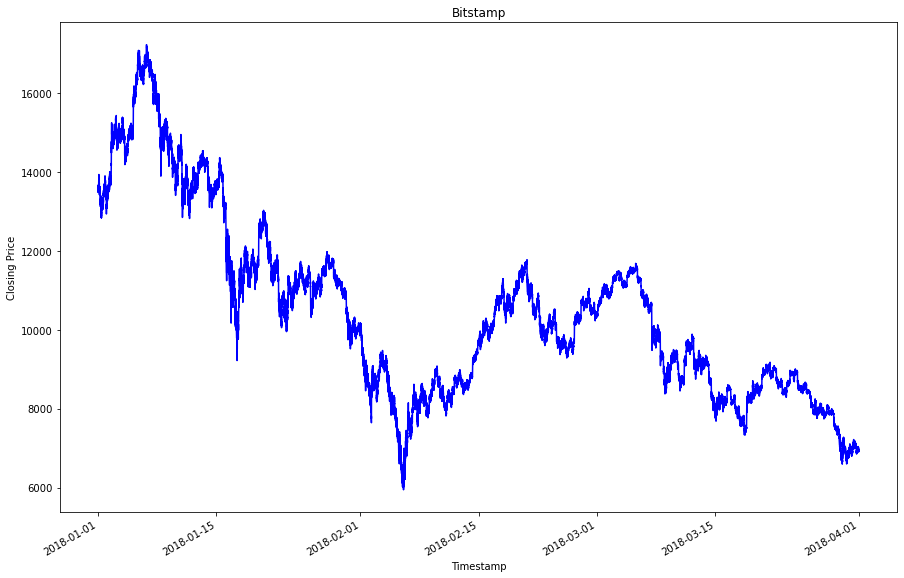

In [26]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(figsize=(15, 10), title="Bitstamp", color="Blue", ylabel="Closing Price")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp', ylabel='Closing Price'>

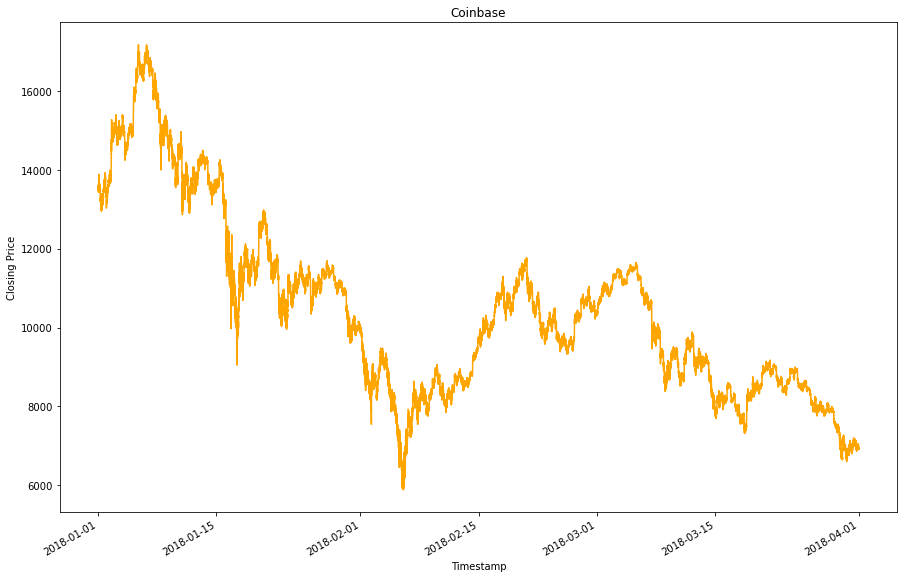

In [28]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(figsize=(15, 10), title="Coinbase", color="orange", ylabel="Closing Price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices (2018-01-01 - 2018-04-01)'}, xlabel='Timestamp', ylabel='Closing Price'>

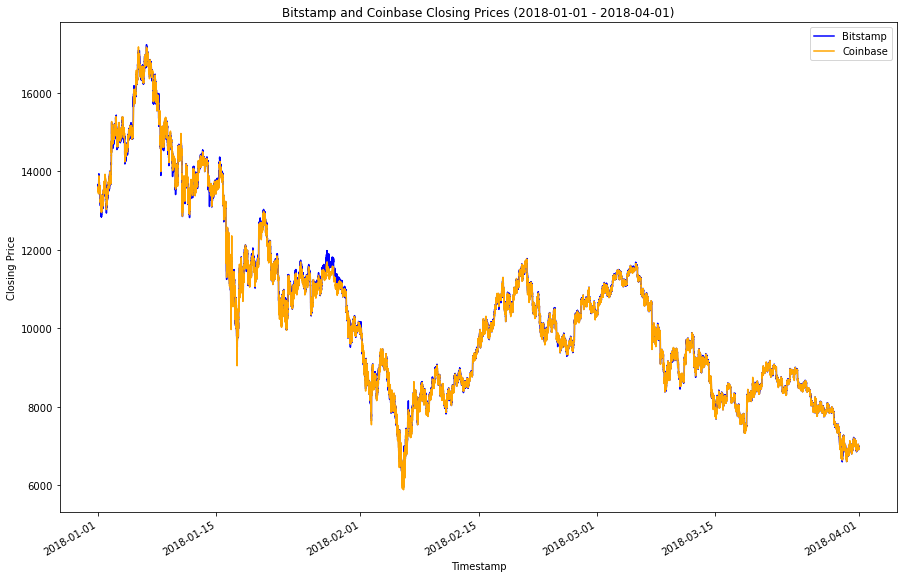

In [30]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices (2018-01-01 - 2018-04-01)", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices From 2018-01-01 - 2018-02-01'}, xlabel='Timestamp', ylabel='Closing Price'>

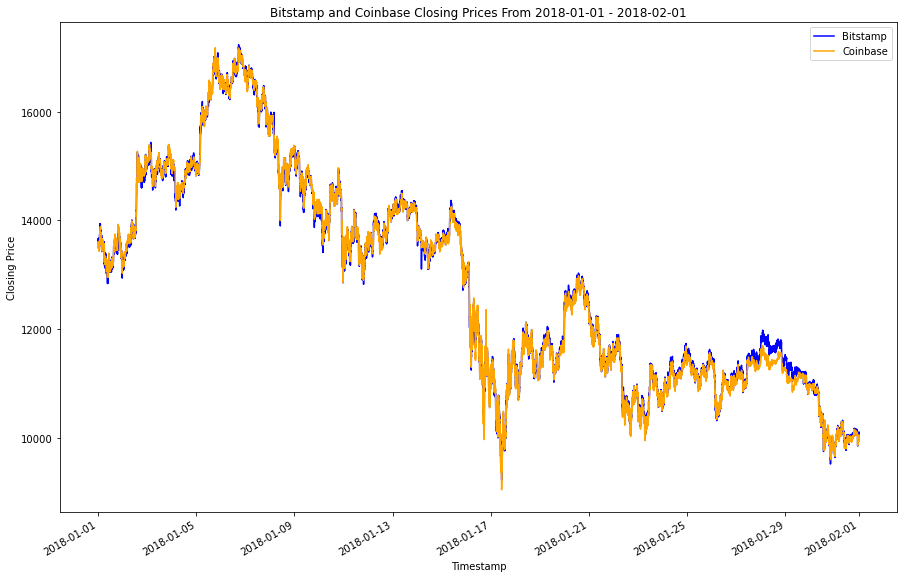

In [32]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced.loc["2018-01-01" : "2018-01-31"].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices From 2018-01-01 - 2018-02-01", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-01" : "2018-01-31"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Price")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices from 2018-02-01 - 2018-03-01'}, xlabel='Timestamp', ylabel='Closing Price'>

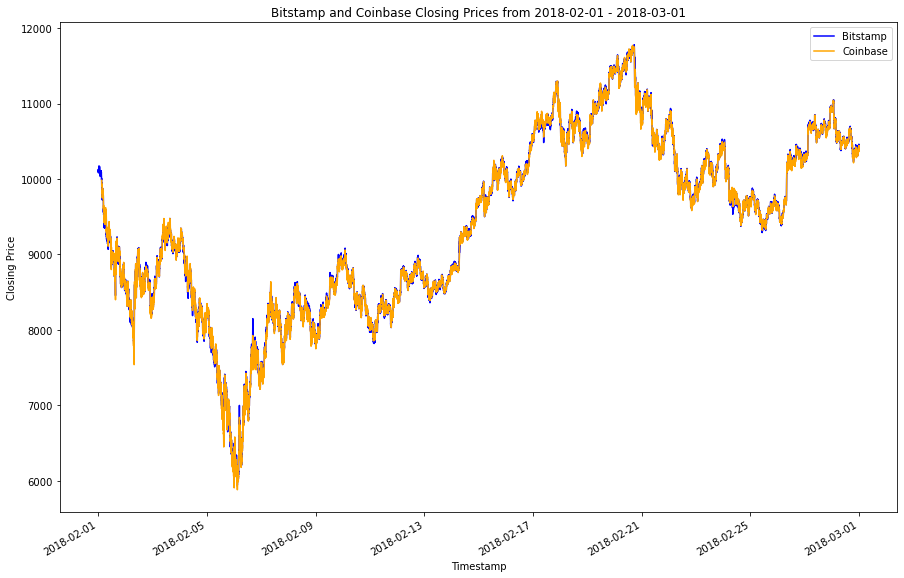

In [34]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
bitstamp_sliced.loc["2018-02-01" : "2018-02-28"].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices from 2018-02-01 - 2018-03-01", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-02-01" : "2018-02-28"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Price")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the degree of spread has changed.

# Focus Your Analysis on Specific Dates

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices of January 29th, 2018'}, xlabel='Timestamp', ylabel='Closing Price'>

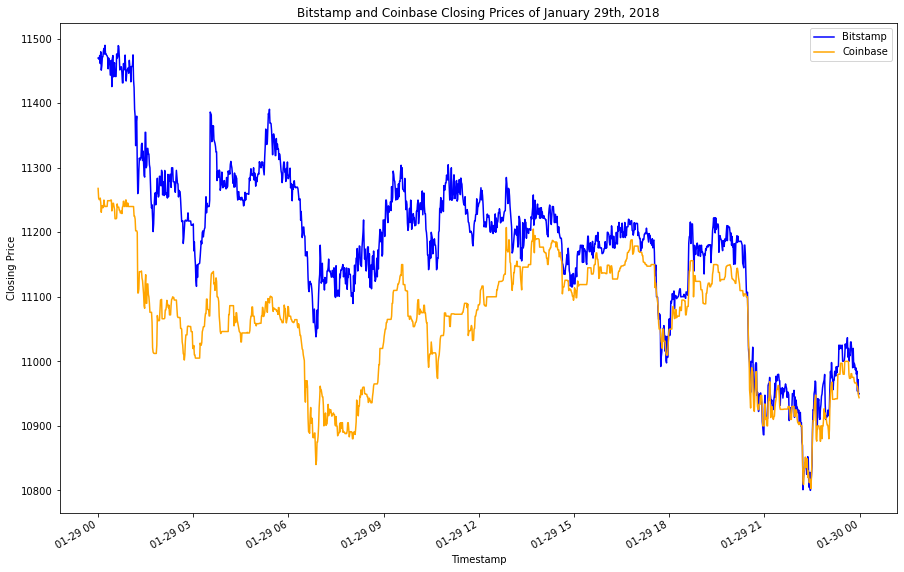

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp_sliced.loc["2018-01-29": "2018-01-29"].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices of January 29th, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-01-29": "2018-01-29"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Price")

In [39]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-29"] - coinbase_sliced.loc["2018-01-29"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

<AxesSubplot:>

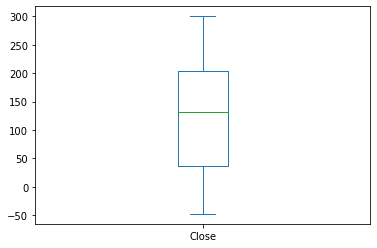

In [40]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices from February 8th, 2018'}, xlabel='Timestamp', ylabel='Closing Prices'>

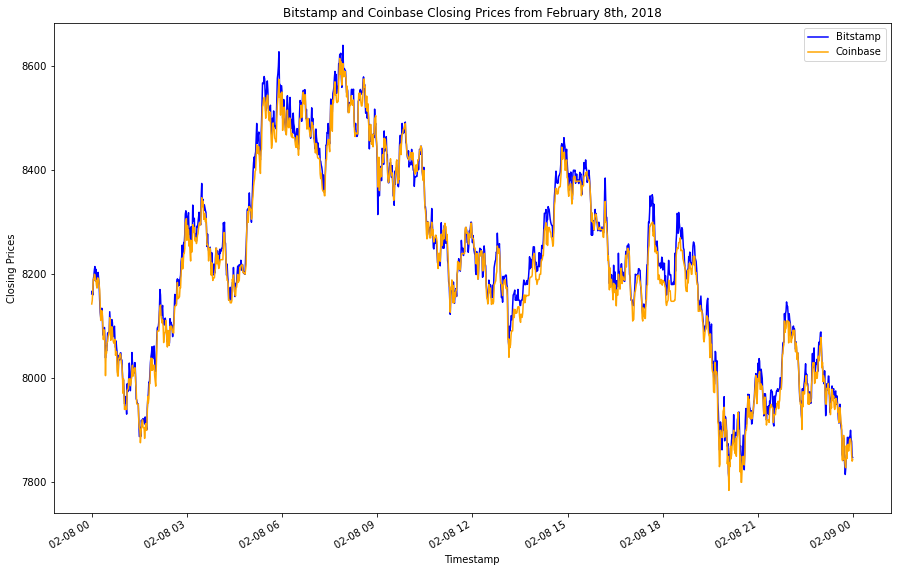

In [42]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
bitstamp_sliced.loc["2018-02-08"].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices from February 8th, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-02-08"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Prices")

In [44]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc["2018-02-08"] - coinbase_sliced.loc["2018-02-08"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean       12.709749
std        16.066741
min       -53.040000
25%         1.700000
50%        12.030000
75%        24.370000
max        90.490000
Name: Close, dtype: float64

<AxesSubplot:>

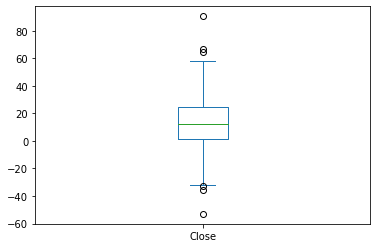

In [45]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Closing Prices from March 13th, 2018'}, xlabel='Timestamp', ylabel='Closing Price'>

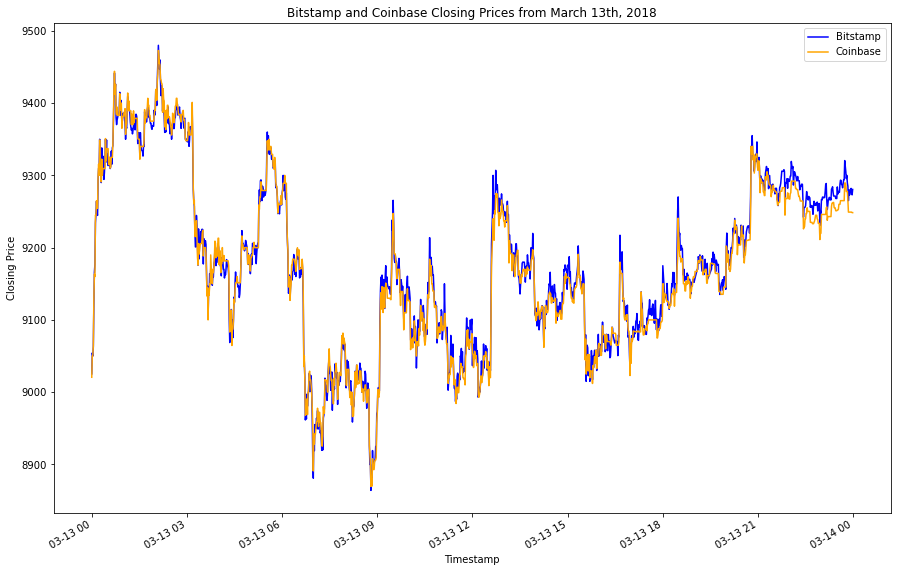

In [47]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
bitstamp_sliced.loc["2018-03-13"].plot(legend=True, figsize=(15, 10), title="Bitstamp and Coinbase Closing Prices from March 13th, 2018", color="blue", label="Bitstamp")
coinbase_sliced.loc["2018-03-13"].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase", ylabel="Closing Price")

In [48]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc["2018-03-13"] - coinbase_sliced.loc["2018-03-13"] 

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1423.000000
mean        5.111145
std        12.253619
min       -47.270000
25%        -3.095000
50%         4.660000
75%        13.365000
max        65.000000
Name: Close, dtype: float64

<AxesSubplot:>

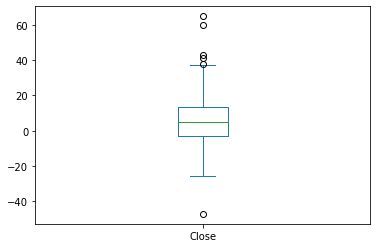

In [49]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

# Calculate the Arbitrage Profits

## For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the<br> lower-priced exchange from the higher-priced one. Then use a conditional statement to <br> generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [58]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc["2018-01-29"] - coinbase_sliced.loc["2018-01-29"]

arbitrage_spread_middle = bitstamp_sliced.loc["2018-02-08"] - coinbase_sliced.loc["2018-02-08"]

arbitrage_spread_late = bitstamp_sliced.loc["2018-03-13"] - coinbase_sliced.loc["2018-03-13"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arby_early = arbitrage_spread_early[arbitrage_spread_early > 0.0]
arby_mid = arbitrage_spread_middle[arbitrage_spread_middle > 0.0]
arby_late = arbitrage_spread_late[arbitrage_spread_late > 0.0] 

display(arby_early.describe())
display(arby_mid.describe())
display(arby_late.describe())

count    1379.000000
mean      124.976425
std        82.959829
min         0.570000
25%        41.885000
50%       144.380000
75%       204.135000
max       300.270000
Name: Close, dtype: float64

count    1132.000000
mean       18.536802
std        12.308671
min         0.010000
25%         8.425000
50%        17.265000
75%        27.117500
max        90.490000
Name: Close, dtype: float64

count    930.000000
mean      11.922226
std        8.680349
min        0.010000
25%        4.992500
50%       10.785000
75%       17.285000
max       65.000000
Name: Close, dtype: float64

## For each of the three dates, calculate the spread returns. To do so, divide the instances that have a <br> positive arbitrage spread by the price of Bitcoin from the exchange <br> you’re buying on. Review the resulting DataFrame.

In [59]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = (arbitrage_spread_early[arbitrage_spread_early > 0.0]) / coinbase_sliced.loc["2018-01-29"]

spread_return_middle = (arbitrage_spread_middle[arbitrage_spread_middle > 0.0]) / coinbase_sliced.loc["2018-02-08"]

spread_return_late = (arbitrage_spread_late[arbitrage_spread_late > 0.0]) / coinbase_sliced.loc["2018-03-13"]

# Review the spread return DataFrame
display(spread_return_early.head())
display(spread_return_middle.head())
display(spread_return_middle.head())

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

Timestamp
2018-02-08 00:00:00    0.002369
2018-02-08 00:01:00    0.002210
2018-02-08 00:02:00         NaN
2018-02-08 00:03:00    0.000001
2018-02-08 00:04:00    0.000855
Name: Close, dtype: float64

Timestamp
2018-02-08 00:00:00    0.002369
2018-02-08 00:01:00    0.002210
2018-02-08 00:02:00         NaN
2018-02-08 00:03:00    0.000001
2018-02-08 00:04:00    0.000855
Name: Close, dtype: float64

## For each of the three dates, narrow down your trading opportunities even further. To do so, <br> determine the number of times your trades with positive returns exceed the 1% minimum <br>threshold that you need to cover your costs.

In [61]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

Timestamp
2018-01-29 00:00:00    0.017925
2018-01-29 00:01:00    0.019284
2018-01-29 00:02:00    0.019307
2018-01-29 00:03:00    0.019840
2018-01-29 00:04:00    0.018541
Name: Close, dtype: float64

Timestamp
2018-02-08 18:23:00    0.011103
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

## Generate the summary statistics of your spread returns that are greater than 1%

In [62]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    742.000000
mean       0.017795
std        0.003142
min        0.010021
25%        0.015371
50%        0.018233
75%        0.020063
max        0.027075
Name: Close, dtype: float64

count    1.000000
mean     0.011103
std           NaN
min      0.011103
25%      0.011103
50%      0.011103
75%      0.011103
max      0.011103
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

## For each of the three dates, calculate the potential profit, in dollars, per trade

In [64]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early = profitable_trades_early * coinbase_sliced.loc["2018-01-29"]
profit_per_trade_mid = profitable_trades_middle * coinbase_sliced.loc["2018-02-28"]
profit_per_trade_late = profitable_trades_late * coinbase_sliced.loc["2018-03-13"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()
profit_per_trade_mid = profit_per_trade_mid.dropna()
profit_per_trade_late = profit_per_trade_late.dropna()

# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_mid.head())
display(profit_per_trade_late.head())

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

## Generate the summary statistics, and plot the results for each of the three DataFrames.

In [65]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_mid.describe())
display(profit_per_trade_late.describe())

count    742.000000
mean     196.724070
std       34.604234
min      111.200000
25%      170.037500
50%      200.930000
75%      221.002500
max      300.270000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profits on January 29, 2018'}, xlabel='Timestamp', ylabel='Closing Price'>

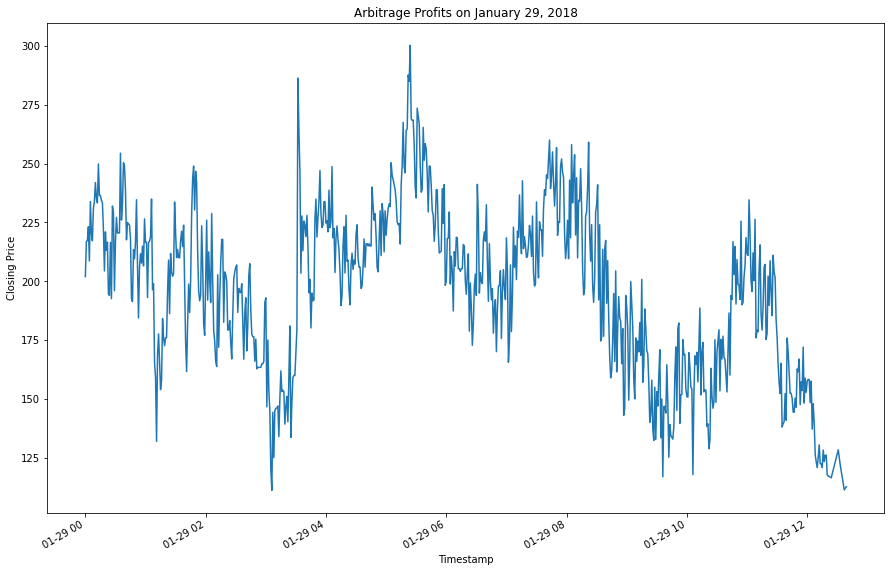

In [68]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(15, 10), title="Arbitrage Profits on January 29, 2018", ylabel="Closing Price")

<AxesSubplot:title={'center':'Arbitrage Profits'}, xlabel='Timestamp', ylabel='Closing Price'>

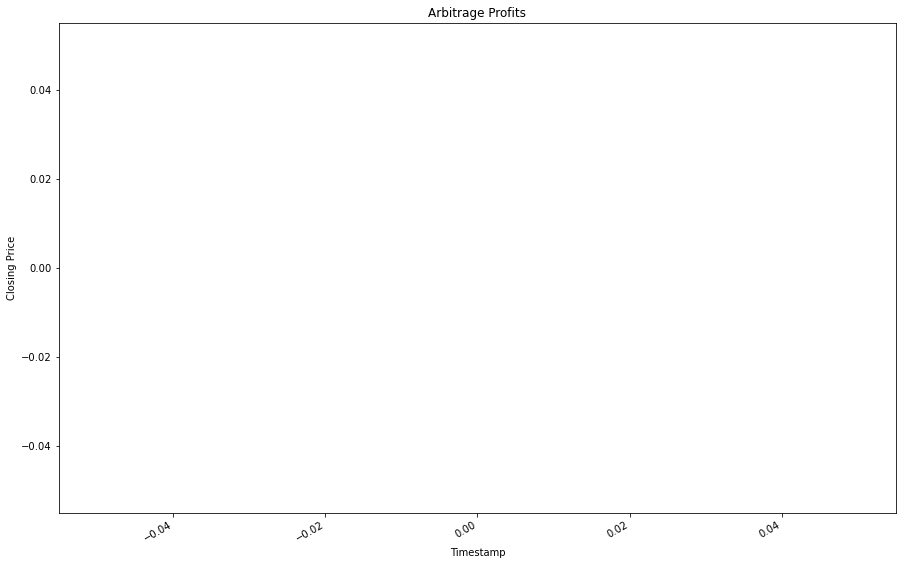

In [70]:
profit_per_trade_mid.plot(figsize=(15, 10), title="Arbitrage Profits", ylabel="Closing Price")

<AxesSubplot:title={'center':'Arbitrage Profits'}, xlabel='Timestamp', ylabel='Closing Price'>

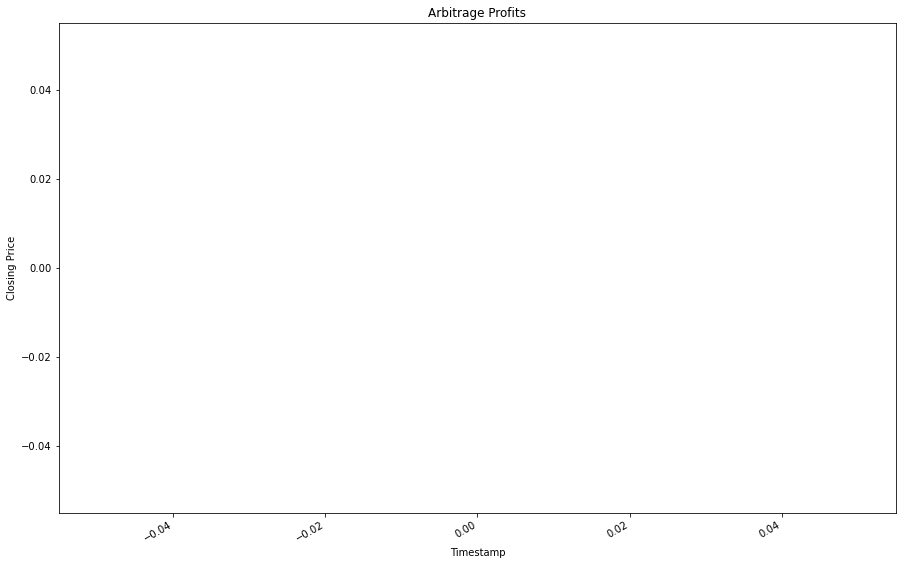

In [71]:
profit_per_trade_late.plot(figsize=(15, 10), title="Arbitrage Profits", ylabel="Closing Price")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [72]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
potential_prof_early = profit_per_trade_early.sum()
display(potential_prof_early)

potential_prof_mid = profit_per_trade_mid.sum()
display(potential_prof_mid)

potential_prof_late = profit_per_trade_late.sum()
display(potential_prof_late)

145969.25999999995

0.0

0.0

## Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames

In [73]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
display(cumulative_profit_early)

cumulative_profit_middle = profit_per_trade_mid.cumsum()
display(cumulative_profit_middle)

cumulative_profit_late = profit_per_trade_late.cumsum()
display(cumulative_profit_late)

Timestamp
2018-01-29 00:00:00       201.98
2018-01-29 00:01:00       418.98
2018-01-29 00:02:00       636.20
2018-01-29 00:03:00       859.42
2018-01-29 00:04:00      1068.06
                         ...    
2018-01-29 12:24:00    145494.72
2018-01-29 12:31:00    145623.16
2018-01-29 12:33:00    145745.09
2018-01-29 12:37:00    145856.51
2018-01-29 12:39:00    145969.26
Name: Close, Length: 742, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits Early'}, xlabel='Timestamp', ylabel='Closing Price'>

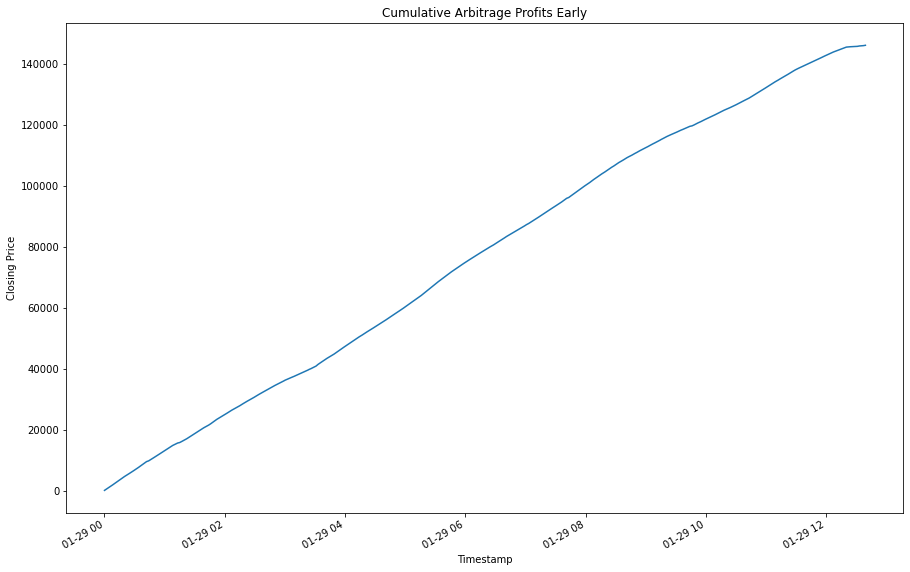

In [75]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 10), title="Cumulative Arbitrage Profits Early", ylabel="Closing Price")

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits Middle'}, xlabel='Timestamp', ylabel='Closing Price'>

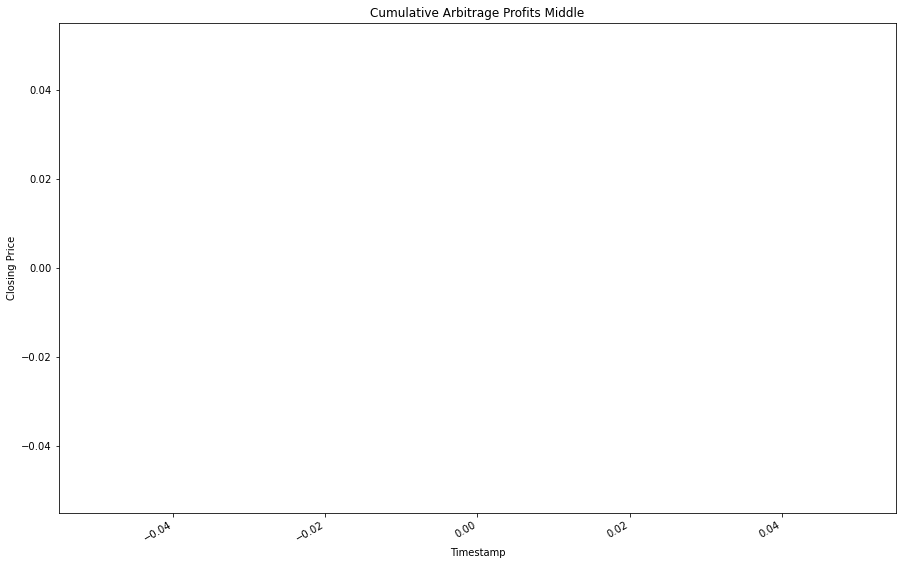

In [76]:
cumulative_profit_middle.plot(figsize=(15, 10), title="Cumulative Arbitrage Profits Middle", ylabel="Closing Price")

<AxesSubplot:title={'center':'Cumulative Arbitrage Profits Late'}, xlabel='Timestamp', ylabel='Closing Price'>

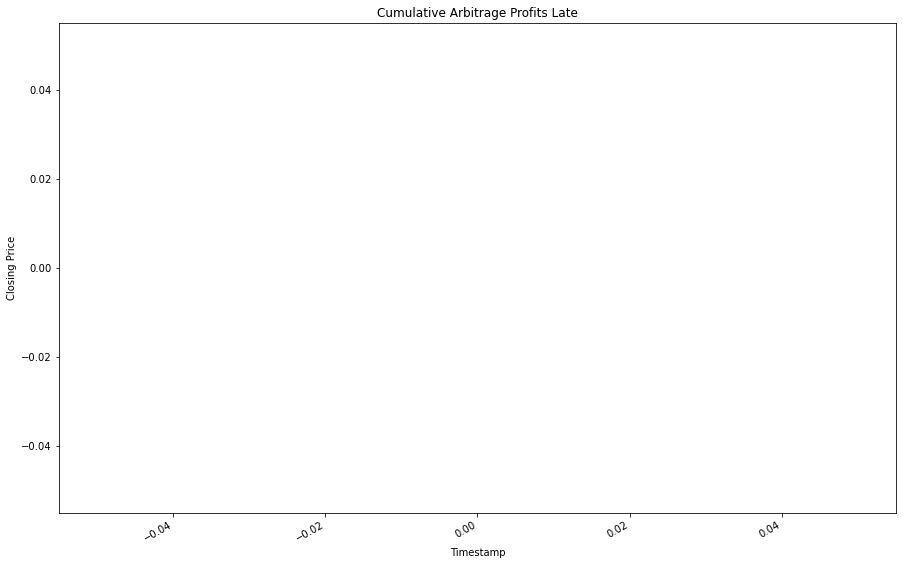

In [77]:
cumulative_profit_late.plot(figsize=(15, 10), title="Cumulative Arbitrage Profits Late", ylabel="Closing Price")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Yes, we can make the most profit when buying the dips on Coinbase while selling the peaks on Bitstamp. This was shown most clearly on January 29th, as well as February 28th and March 13th.